In [139]:
import pandas as pd

# loading the csv file
df = pd.read_csv('../datasets/titanic_unprocessed.csv')
# print first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploring Dataset 

In [ ]:
df.info() # gives us not null count and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for Null / Missing values and Performing Preprocessing

In [141]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
# irrelavant columns
df.drop(columns=['Name' , 'Cabin' , 'Ticket'] , axis = 1 , inplace=True)


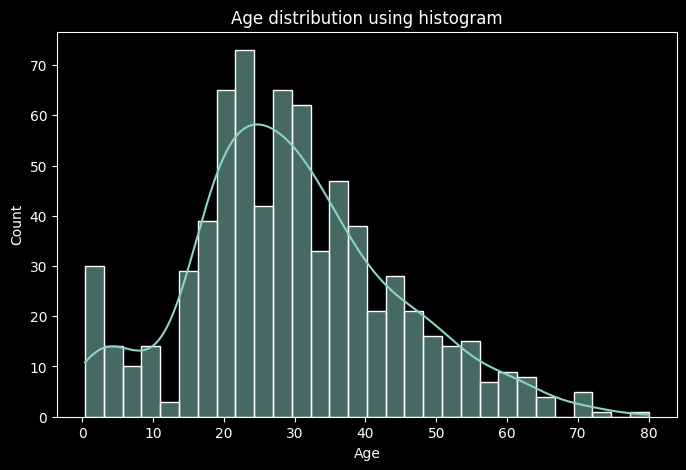

In [143]:
#visualizing distribution of age column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'] , bins = 30 , kde=True)
plt.title('Age distribution using histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True) #Median for right skewed distribution

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #most common one

In [145]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Encoding Categorical Features

In [146]:
df.select_dtypes(include='object').columns


Index(['Sex', 'Embarked'], dtype='object')

In [147]:
#encoding 'Age' column

df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,28.0,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [148]:
#one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [149]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,False,True
887,888,1,1,0,19.0,0,0,30.0000,False,True
888,889,0,3,0,28.0,1,2,23.4500,False,True
889,890,1,1,1,26.0,0,0,30.0000,False,False


In [150]:
df[['Embarked_Q','Embarked_S']] = df[['Embarked_Q','Embarked_S']].astype(int)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1
887,888,1,1,0,19.0,0,0,30.0000,0,1
888,889,0,3,0,28.0,1,2,23.4500,0,1
889,890,1,1,1,26.0,0,0,30.0000,0,0


Normalize/standardize the numerical features

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#'Age' and 'Fare' are continuous values

df[['Age', 'Fare']] = scaler.fit_transform(df[['Age','Fare']])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,1,0,-0.502445,0,1
1,2,1,1,0,0.663861,1,0,0.786845,0,0
2,3,1,3,0,-0.258337,0,0,-0.488854,0,1
3,4,1,1,0,0.433312,1,0,0.420730,0,1
4,5,0,3,1,0.433312,0,0,-0.486337,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,-0.181487,0,0,-0.386671,0,1
887,888,1,1,0,-0.796286,0,0,-0.044381,0,1
888,889,0,3,0,-0.104637,1,2,-0.176263,0,1
889,890,1,1,1,-0.258337,0,0,-0.044381,0,0


Visualize outliers using boxplots and remove them.


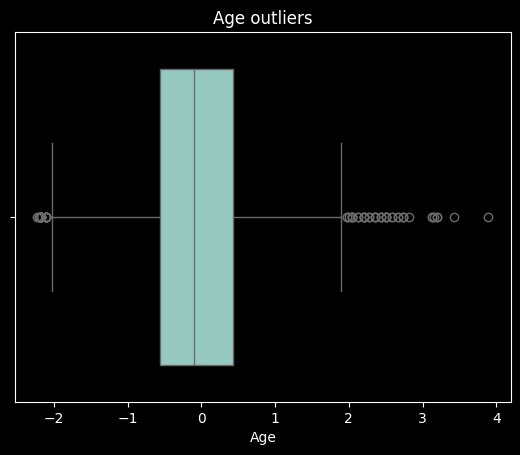

In [153]:
sns.boxplot(x=df['Age'])
plt.title('Age outliers')
plt.show()

In [164]:
#Z- SCORE RANGE = (-2.5 TO 2.5)
df = df[(df['Age'] >= -2.5) & (df['Age'] <= 2.5)]

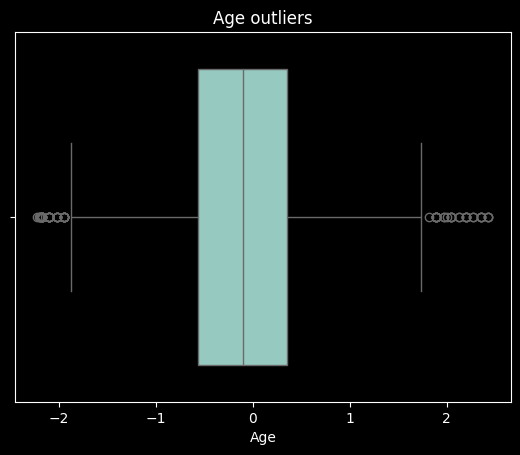

In [165]:
#OUTLIERS REDUCED
sns.boxplot(x=df['Age'])
plt.title('Age outliers')
plt.show()

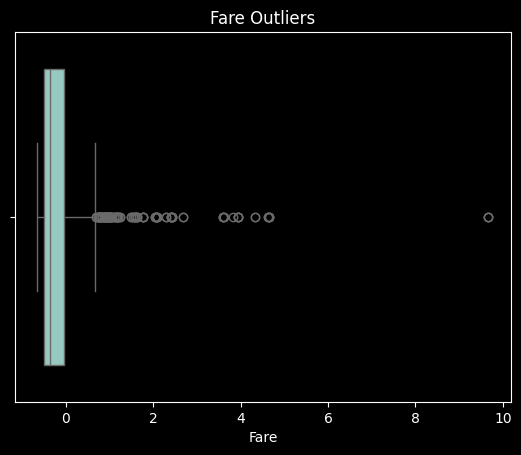

In [159]:
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

In [166]:
df = df[(df['Fare'] >= -2.5) & (df['Fare'] <= 2.5)] 

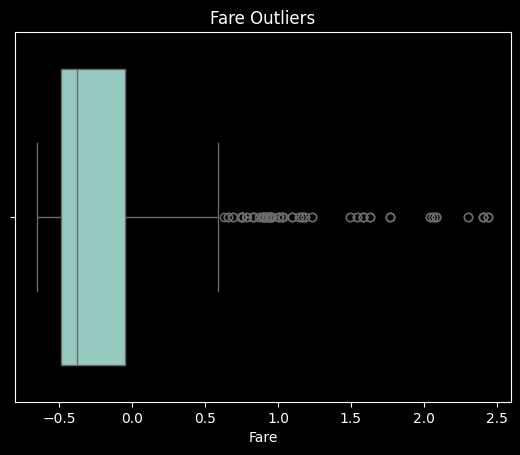

In [ ]:
#EXTREME OUTLIERS REDUCED
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

In [171]:
df.to_csv('../datasets/titanic_processed.csv' , index=False)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,-0.565736,1,0,-0.502445,0,1
1,2,1,1,0,0.663861,1,0,0.786845,0,0
2,3,1,3,0,-0.258337,0,0,-0.488854,0,1
3,4,1,1,0,0.433312,1,0,0.420730,0,1
4,5,0,3,1,0.433312,0,0,-0.486337,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,-0.181487,0,0,-0.386671,0,1
887,888,1,1,0,-0.796286,0,0,-0.044381,0,1
888,889,0,3,0,-0.104637,1,2,-0.176263,0,1
889,890,1,1,1,-0.258337,0,0,-0.044381,0,0
